# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        
        for i in range(0,n+1):
            positions[i] = self.pos
            self.pos = self.pos + self.pickStep()
            
            
        return positions

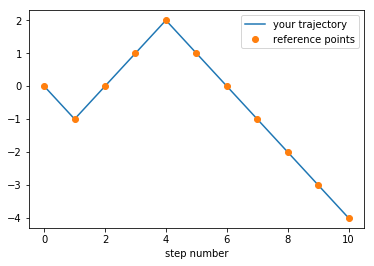

In [3]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

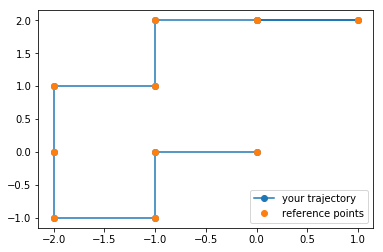

In [4]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

[[  0.]
 [ -1.]
 [ -2.]
 [ -3.]
 [ -4.]
 [ -5.]
 [ -6.]
 [ -5.]
 [ -4.]
 [ -5.]
 [ -6.]
 [ -5.]
 [ -6.]
 [ -7.]
 [ -8.]
 [ -9.]
 [ -8.]
 [ -9.]
 [-10.]
 [ -9.]
 [-10.]
 [-11.]
 [-12.]
 [-13.]
 [-14.]
 [-15.]
 [-14.]
 [-15.]
 [-14.]
 [-15.]
 [-14.]
 [-13.]
 [-12.]
 [-13.]
 [-12.]
 [-11.]
 [-10.]
 [ -9.]
 [ -8.]
 [ -9.]
 [-10.]
 [-11.]
 [-12.]
 [-13.]
 [-14.]
 [-13.]
 [-14.]
 [-15.]
 [-14.]
 [-15.]
 [-16.]
 [-17.]
 [-18.]
 [-19.]
 [-18.]
 [-19.]
 [-20.]
 [-21.]
 [-20.]
 [-21.]
 [-20.]
 [-21.]
 [-22.]
 [-21.]
 [-20.]
 [-21.]
 [-20.]
 [-21.]
 [-20.]
 [-19.]
 [-20.]
 [-21.]
 [-20.]
 [-21.]
 [-22.]
 [-21.]
 [-22.]
 [-21.]
 [-22.]
 [-23.]
 [-22.]
 [-23.]
 [-24.]
 [-23.]
 [-22.]
 [-23.]
 [-24.]
 [-25.]
 [-26.]
 [-25.]
 [-26.]
 [-25.]
 [-26.]
 [-27.]
 [-26.]
 [-27.]
 [-26.]
 [-27.]
 [-26.]
 [-25.]
 [-26.]]


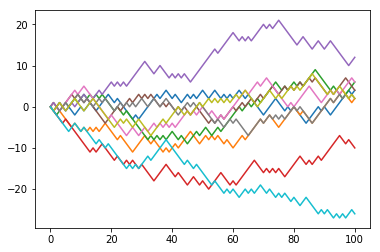

In [9]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)
print(ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


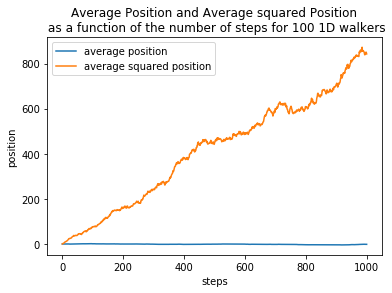

In [19]:
nsteps = 1000
ndim = 1
nwalkers = 100

for i in range(nwalkers):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    if i == 0:
        positionmat = ys
    else:
        positionmat = numpy.hstack([positionmat, ys])
average = []
averagesquare = []
for i in range(0, nsteps+1):
    averagepoint = numpy.average(positionmat[i])
    average.append(averagepoint)
    squaredist = numpy.average((positionmat[i] - average[i])**2)
    averagesquare.append(squaredist)
    
plt.plot(average, label = 'average position')
plt.plot(averagesquare, label = 'average squared position')
plt.legend(loc = "upper left")
plt.xlabel('steps')
plt.ylabel('position')
plt.title('Average Position and Average squared Position\n as a function of the number of steps for 100 1D walkers')
plt.show()
    
    
    
    
    



        
    
    
    
    
        

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


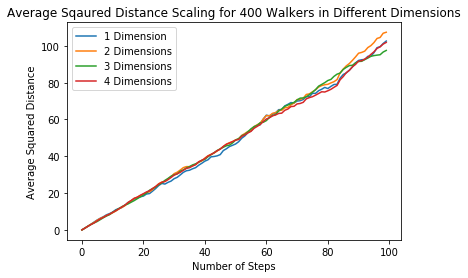

In [27]:
nsteps = 100
nwalkers = 400  

def average(numberofwalkers, numberofsteps, numberofdimensions,seed):
    summation = 0
    numpy.random.seed(seed)
    for i in range(numberofwalkers):
        w = walker(numpy.zeros(numberofdimensions), ndim = numberofdimensions)
        ys = w.doSteps(numberofsteps -1)
        summation = summation + ys
    return summation/numberofwalkers       
def function2(numberofwalkers, numberofsteps, seed, numberdim):
    summation  = 0
    numpy.random.seed(seed)
    mean = average(numberofwalkers, numberofsteps, numberdim,seed)
    for i in range(numberofwalkers):
        w = walker(numpy.zeros(numberdim), ndim = numberdim)
        ys = w.doSteps(numberofsteps -1)
        ys = ys - mean
        dots = []
        for k in range(0,numberofsteps):
            dot = numpy.dot(ys[k], ys[k])
            dots.append(dot)
        sumsquared = numpy.array(dots)
        summation =sumsquared + summation
    return summation/nwalkers    
plt.plot(numpy.arange(0,nsteps), function2(nwalkers,nsteps, 1000,1), label = '1 Dimension')
plt.plot(numpy.arange(0,nsteps), function2(nwalkers,nsteps, 1000,2), label = '2 Dimensions' )
plt.plot(numpy.arange(0,nsteps), function2(nwalkers,nsteps, 1000,3), label = '3 Dimensions')
plt.plot(numpy.arange(0,nsteps), function2(nwalkers,nsteps, 1000,4), label = '4 Dimensions')
plt.legend(loc = 'upper left')
plt.xlabel("Number of Steps")
plt.ylabel("Average Squared Distance")
plt.title("Average Sqaured Distance Scaling for 400 Walkers in Different Dimensions")
plt.show()


    
    






    






## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


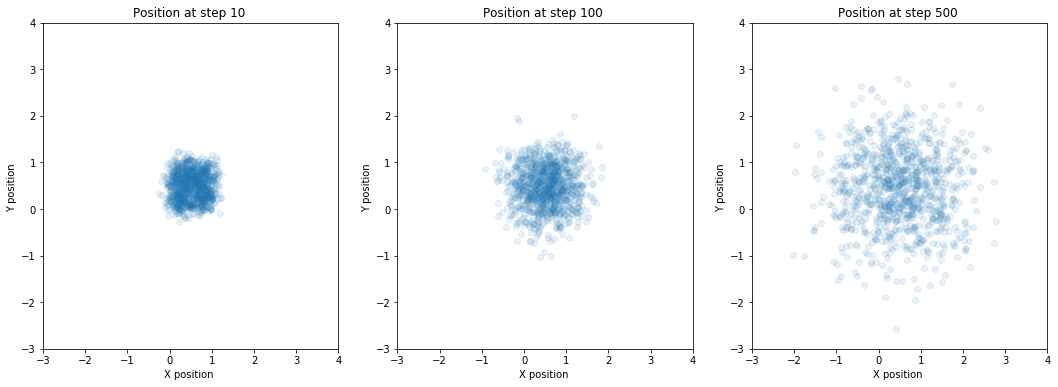

In [8]:
ndim=2
nwalkers=1000

step_size = 0.05

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

        
x10 = []
y10 = []
x100 = []
y100 = []       
x500 = []
y500 = []

for i in range(0, nwalkers):
        w = walker(rand_pos[i], ndim = 2, step_size = 0.05)
        do500steps = w.doSteps(500)
        x10.append(do500steps[10,0])
        y10.append(do500steps[10,1])
        x100.append(do500steps[100,0])
        y100.append(do500steps[100,1])
        x500.append(do500steps[500,0])
        y500.append(do500steps[500,1])          
nx10 = numpy.array(x10)
ny10 = numpy.array(y10)
nx100 = numpy.array(x100)
ny100 = numpy.array(y100)        
nx500 = numpy.array(x500)
ny500 = numpy.array(y500)


xmat = numpy.vstack((nx10,nx100,nx500))
ymat = numpy.vstack((ny10,ny100,ny500))


# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("Position at step {} ".format(nsteps))  
    plt.xlabel("X position ")
    plt.ylabel("Y position ")
    plt.scatter(xmat[i,:], ymat[i,:], alpha=0.1)